<div style='background-image: url("../share/header_no_text.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Scientific Python</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">A super quick crash course</div>
        </div>
    </div>
</div>

## Exercises

The goal of these exercises is to get you to actually write some Python code. It is the only way to learn.

### Exercise A: Linear Regression

In the theme of this workshop we'll try to fit a linear line to a point cloud of data values. You will learn a lot more about this in the following days.

Use the following equation and find parameters `a` and `b` that well fit the data.

$$f(x) = a + b * x$$

We will first generate the data to be fitted.

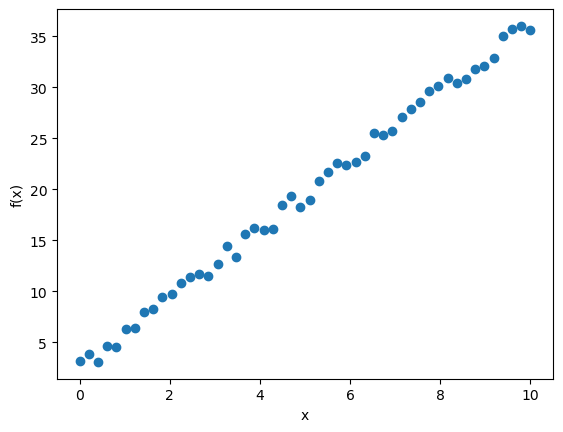

In [1]:
# Generate some true data.
import numpy as np
import matplotlib.pyplot as plt

true_a = 2.5
true_b = 3.4
N = 50

scatter = 2.0

# We only assume some scatter in the measurements.
x = np.linspace(0, 10, N)
y = true_a + true_b * x + (np.random.random(N) - 0.5) * scatter

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

Goal: Find `a` + `b` given `x` and `y`. Do this any way you see fit.

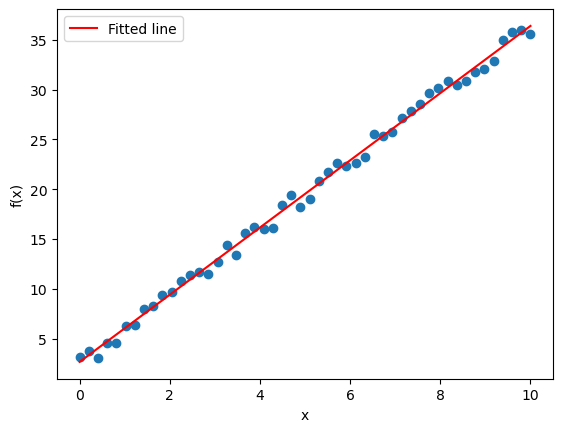

In [2]:
# TODO: Fit a linear model to the data and plot the result      
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0] 
plt.scatter(x, y)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()  

---

### Exercise B: Functions, NumPy, and Matplotlib

A. Write a function that takes a NumPy array `x` and `a`, `b`, and `c` and returns

$$
f(x) = a x^2 + b x + c
$$

B. Plot the result of that function with matplotlib.

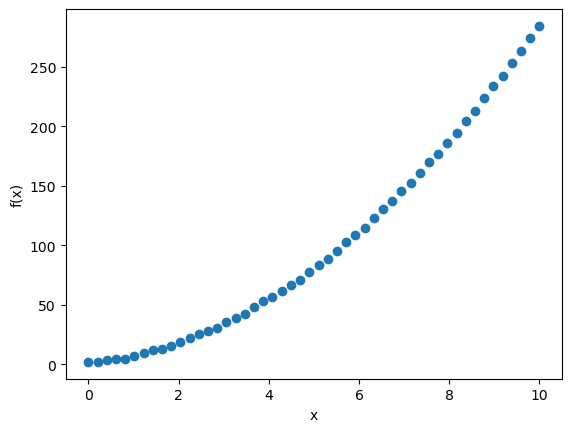

In [3]:
# write quadratic function 
def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

f = quadratic(x, true_a, true_b, 1.0)
y = f + (np.random.random(N) - 0.5) * scatter
plt.scatter(x, y)
#plt.plot(x, quadratic(x, a_fit, b_fit, c_fit), 'g', label='Fitted quadratic')
plt.xlabel("x")
plt.ylabel("f(x)")
#plt.legend()
plt.show()


---

### Exercise C: 99 Bottles of Beer

*(stolen from http://www.ling.gu.se/~lager/python_exercises.html)*


"99 Bottles of Beer" is a traditional song in the United States and Canada. It is popular to sing on long trips, as it has a very repetitive format which is easy to memorize, and can take a long time to sing. The song's simple lyrics are as follows:

```
99 bottles of beer on the wall, 99 bottles of beer.
Take one down, pass it around, 98 bottles of beer on the wall.
```

The same verse is repeated, each time with one fewer bottle. The song is completed when the singer or singers reach zero.

Your task here is write a Python program capable of generating all the verses of the song.


In [4]:
def verse(n):
    return f'{n} bottles of beer on the wall, {n} bottles of beer.' + f'\nTake one down, pass it around, {n-1} bottles of beer on the wall'

for bottles in range(99, 1, -1):
    print(verse(bottles))
    print()

99 bottles of beer on the wall, 99 bottles of beer.
Take one down, pass it around, 98 bottles of beer on the wall

98 bottles of beer on the wall, 98 bottles of beer.
Take one down, pass it around, 97 bottles of beer on the wall

97 bottles of beer on the wall, 97 bottles of beer.
Take one down, pass it around, 96 bottles of beer on the wall

96 bottles of beer on the wall, 96 bottles of beer.
Take one down, pass it around, 95 bottles of beer on the wall

95 bottles of beer on the wall, 95 bottles of beer.
Take one down, pass it around, 94 bottles of beer on the wall

94 bottles of beer on the wall, 94 bottles of beer.
Take one down, pass it around, 93 bottles of beer on the wall

93 bottles of beer on the wall, 93 bottles of beer.
Take one down, pass it around, 92 bottles of beer on the wall

92 bottles of beer on the wall, 92 bottles of beer.
Take one down, pass it around, 91 bottles of beer on the wall

91 bottles of beer on the wall, 91 bottles of beer.
Take one down, pass it aroun

#### Ceasar Cipher

*(stolen from http://www.ling.gu.se/~lager/python_exercises.html)*

In cryptography, a Caesar cipher is a very simple encryption techniques in which each letter in the plain text is replaced by a letter some fixed number of positions down the alphabet. For example, with a shift of 3, A would be replaced by D, B would become E, and so on. The method is named after Julius Caesar, who used it to communicate with his generals. ROT-13 ("rotate by 13 places") is a widely used example of a Caesar cipher where the shift is 13. In Python, the key for ROT-13 may be represented by means of the following dictionary:

```python
key = {'a':'n', 'b':'o', 'c':'p', 'd':'q', 'e':'r', 'f':'s', 'g':'t', 'h':'u', 
       'i':'v', 'j':'w', 'k':'x', 'l':'y', 'm':'z', 'n':'a', 'o':'b', 'p':'c', 
       'q':'d', 'r':'e', 's':'f', 't':'g', 'u':'h', 'v':'i', 'w':'j', 'x':'k',
       'y':'l', 'z':'m', 'A':'N', 'B':'O', 'C':'P', 'D':'Q', 'E':'R', 'F':'S', 
       'G':'T', 'H':'U', 'I':'V', 'J':'W', 'K':'X', 'L':'Y', 'M':'Z', 'N':'A', 
       'O':'B', 'P':'C', 'Q':'D', 'R':'E', 'S':'F', 'T':'G', 'U':'H', 'V':'I', 
       'W':'J', 'X':'K', 'Y':'L', 'Z':'M'}
```

Your task in this exercise is to implement an decoder of ROT-13. Once you're done, you will be able to read the following secret message:

```
Pnrfne pvcure? V zhpu cersre Pnrfne fnynq!
```

**BONUS:** Write an encoder!



In [5]:
def decrypt_cipher(encrypted_string, shift=13):
    decrypted_string = ""

    for char in encrypted_string:
        if 'a' <= char <= 'z':
            decrypted_char = chr((ord(char) - ord('a') - shift) % 26 + ord('a'))
        elif 'A' <= char <= 'Z':
            decrypted_char = chr((ord(char) - ord('A') - shift) % 26 + ord('A'))
        else:
            decrypted_char = char
        decrypted_string += decrypted_char

    return decrypted_string

encrypted_string = "Pnrfne pvcure? V zhpu cersre Pnrfne fnynq."
shift = 13
decrypted_string = decrypt_cipher(encrypted_string, shift)
print(decrypted_string)
                           

Caesar cipher? I much prefer Caesar salad.
